# Practise Tasks:

For the following Datasets:

Salary.csv: Try implementing Linear Regression with OLS and explain the Result.

Insurance.csv: Try implementing Multiple Linear Regression from Scratch: While Doing that also practise following:
  1.   Can you Identify Qualitative and Quantitative Varaible.
  2.   Drop all the Qualitative Varaible from the dataframe.
  3.   If you do not want to drop the qualitative varaible, you can convert them into numeric variable as you did in Assignment-1. {You can also try sklearn label encoder function.}
  4.   Practise your Visualization Skills.
  



#Salary.csv

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Salary dataset
salary_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Datasets/Salary_Data.csv')

# Define the feature (X) and target (y)
X = salary_data['YearsExperience']
y = salary_data['Salary']

# Add a constant to the feature for the intercept term in OLS
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.14e-20
Time:                        13:45:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

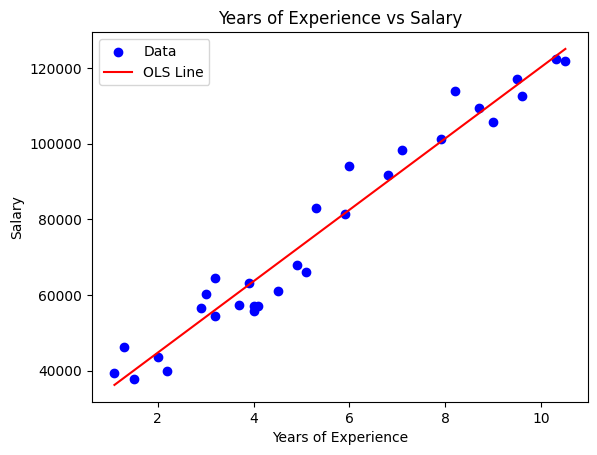

In [14]:
plt.scatter(salary_data['YearsExperience'], salary_data['Salary'], color='blue', label='Data')
plt.plot(salary_data['YearsExperience'], model.predict(X), color='red', label='OLS Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()

#Insurance.csv

In [15]:
insurance_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Datasets/insurance.csv')
print(insurance_data.dtypes)

qualitative = insurance_data.select_dtypes(include=['object']).columns.tolist()
quantitative = insurance_data.select_dtypes(exclude=['object']).columns.tolist()

print("Qualitative Variables:", qualitative)
print("Quantitative Variables:", quantitative)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Qualitative Variables: ['sex', 'smoker', 'region']
Quantitative Variables: ['age', 'bmi', 'children', 'charges']


In [16]:
insurance_quantitative = insurance_data.drop(columns=qualitative)
print(insurance_quantitative.head())


   age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520


In [17]:
from sklearn.preprocessing import LabelEncoder

insurance_encoded = insurance_data.copy()
for col in qualitative:
    le = LabelEncoder()
    insurance_encoded[col] = le.fit_transform(insurance_encoded[col])
print(insurance_encoded.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [18]:
X = insurance_encoded.drop(columns=['charges'])
y = insurance_encoded['charges']

X = np.c_[np.ones(X.shape[0]), X]
X_transpose = X.T
coefficients = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

print("Coefficients:", coefficients)

# Predictions
y_pred = X.dot(coefficients)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [-11815.45232123    257.28807486   -131.11057962    332.57013224
    479.36939355  23820.43412267   -353.64001656]
Mean Squared Error: 36527659.88568238
R-squared: 0.7507372027994937
